# Ekstraksi Kata Kunci pada dokumen

## Menampilkan data

In [1]:
import requests
import csv
import pandas as pd
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import networkx as nx


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataf = pd.read_csv('/content/drive/MyDrive/penambangan_web/hasil/databerita.csv')
dataf

,Kategori,Judul,Tanggal,Link,Konten
0,Politik,"Buka Pembekalan Adat, Bupati Rohil Ajak Calon ...","Jun 12, 2023",https://www.detikinews.com/buka-pembekalan-ada...,"Rokan Hilir, detikinews.com — Bupati Rokan Hil..."
1,Politik,DPRD Kepulauan Meranti Gelar Rapat Paripurna P...,"Nov 18, 2022",https://www.detikinews.com/dprd-kepulauan-mera...,"SELATPANJANG, detikinews.com – DPRD Kepulauan ..."
2,Politik,Bupati Siak bersama Forkopimda Ikuti Upacara H...,"Jun 1, 2022",https://www.detikinews.com/bupati-siak-bersama...,"SIAK, detikinews.com — Bupati Siak Alfedri, di..."
3,Politik,Bupati H.M. Adil Akan Salurkan Dana BLT Rp200r...,"Sep 24, 2021",https://www.detikinews.com/bupati-h-m-adil-aka...,"Meranti, detikinews.com — Sesuai Program dan J..."
4,Politik,Wakil Bupati Bagus Santoso Sambut Kunjungan Si...,"Mei 5, 2021",https://www.detikinews.com/wakil-bupati-bagus-...,"Bengkalis, Detikinews.com — Pengurus Dewan Pim..."
5,Politik,H. Sari Antoni Kembali Terpilih Pada Musda V S...,"Agu 21, 2020",https://www.detikinews.com/h-sari-antoni-kemba...,"PASIR PENGARAIAN, Detikinews.com — Dewan Pimpi..."
6,Politik,Lipun Apresisasi Polda Riau Dalam Penegakan Hu...,"Feb 19, 2020",https://www.detikinews.com/lipun-apresisasi-po...,"BENGKALIS, Detikinews.com — Pasca pemanggilan..."
7,Sosial,Mahasiswa KKN UNRI Desa Sungai Batang Gelar So...,"Agu 18, 2023",https://www.detikinews.com/mahasiswa-kkn-unri-...,"BENGKALIS, detikinews.com – Guna meningkatkan ..."
8,Sosial,Bujang Kampung Fokus Pelayanan Sosial dan Kepe...,"Jul 16, 2022",https://www.detikinews.com/bujang-kampung-foku...,"SIAK, detikinews.com — Pemerintah kabupaten Si..."
9,Sosial,Sinergi di Bidang Layanan Administrasi Kependu...,"Jul 9, 2021",https://www.detikinews.com/sinergi-di-bidang-l...,"SIAK, detikinews.com — Pemerintah Kabupaten Si..."


### Cek data duplikasi

In [4]:
dataf.drop_duplicates()


,Kategori,Judul,Tanggal,Link,Konten
0,Politik,"Buka Pembekalan Adat, Bupati Rohil Ajak Calon ...","Jun 12, 2023",https://www.detikinews.com/buka-pembekalan-ada...,"Rokan Hilir, detikinews.com — Bupati Rokan Hil..."
1,Politik,DPRD Kepulauan Meranti Gelar Rapat Paripurna P...,"Nov 18, 2022",https://www.detikinews.com/dprd-kepulauan-mera...,"SELATPANJANG, detikinews.com – DPRD Kepulauan ..."
2,Politik,Bupati Siak bersama Forkopimda Ikuti Upacara H...,"Jun 1, 2022",https://www.detikinews.com/bupati-siak-bersama...,"SIAK, detikinews.com — Bupati Siak Alfedri, di..."
3,Politik,Bupati H.M. Adil Akan Salurkan Dana BLT Rp200r...,"Sep 24, 2021",https://www.detikinews.com/bupati-h-m-adil-aka...,"Meranti, detikinews.com — Sesuai Program dan J..."
4,Politik,Wakil Bupati Bagus Santoso Sambut Kunjungan Si...,"Mei 5, 2021",https://www.detikinews.com/wakil-bupati-bagus-...,"Bengkalis, Detikinews.com — Pengurus Dewan Pim..."
5,Politik,H. Sari Antoni Kembali Terpilih Pada Musda V S...,"Agu 21, 2020",https://www.detikinews.com/h-sari-antoni-kemba...,"PASIR PENGARAIAN, Detikinews.com — Dewan Pimpi..."
6,Politik,Lipun Apresisasi Polda Riau Dalam Penegakan Hu...,"Feb 19, 2020",https://www.detikinews.com/lipun-apresisasi-po...,"BENGKALIS, Detikinews.com — Pasca pemanggilan..."
7,Sosial,Mahasiswa KKN UNRI Desa Sungai Batang Gelar So...,"Agu 18, 2023",https://www.detikinews.com/mahasiswa-kkn-unri-...,"BENGKALIS, detikinews.com – Guna meningkatkan ..."
8,Sosial,Bujang Kampung Fokus Pelayanan Sosial dan Kepe...,"Jul 16, 2022",https://www.detikinews.com/bujang-kampung-foku...,"SIAK, detikinews.com — Pemerintah kabupaten Si..."
9,Sosial,Sinergi di Bidang Layanan Administrasi Kependu...,"Jul 9, 2021",https://www.detikinews.com/sinergi-di-bidang-l...,"SIAK, detikinews.com — Pemerintah Kabupaten Si..."


### Cek data null

In [5]:
dataf.isnull().sum()

Kategori    0
Judul       0
Tanggal     0
Link        0
Konten      0
dtype: int64

### Hapus data null

In [6]:
df = dataf.dropna()
df.isnull().sum()

Kategori    0
Judul       0
Tanggal     0
Link        0
Konten      0
dtype: int64

### Reset Index

In [7]:
df = df.reset_index(drop=True)

In [8]:
df.shape

(55, 5)

### Menghitung jumlah data perkategori

In [9]:
df['Kategori'].value_counts()

Sosial      42
Politik      7
Olahraga     6
Name: Kategori, dtype: int64

## Preprocessing

### Cleaning data

Lower Case

In [10]:
df['Konten'] = df['Konten'].str.lower()
print(df['Konten'])

0     rokan hilir, detikinews.com — bupati rokan hil...
1     selatpanjang, detikinews.com – dprd kepulauan ...
2     siak, detikinews.com — bupati siak alfedri, di...
3     meranti, detikinews.com — sesuai program dan j...
4     bengkalis, detikinews.com — pengurus dewan pim...
5     pasir pengaraian, detikinews.com — dewan pimpi...
6     bengkalis, detikinews.com —  pasca pemanggilan...
7     bengkalis, detikinews.com – guna meningkatkan ...
8     siak, detikinews.com — pemerintah kabupaten si...
9     siak, detikinews.com — pemerintah kabupaten si...
10    siak, detikinews.com — bupati siak alfedri mem...
11    pulau gadang, detikinews.com – untuk menangkal...
12    rohul, buletininews.com — luar biasa kapolres ...
13    rohil, detikinews.com — sebanyak 200 warga rok...
14    inhu, detikinews.com – selaku bunda paud indra...
15    rohil, detikinews.com- penyediaan internet mur...
16    inhu, detikinewscom — pemerintah daerah kabupa...
17    bengkalis, detikinews – bapemperda dprd ka

Menghapus kata

In [11]:
# Daftar kata yang ingin dihilangkan
kata_hapus = ['advertisement', 'detikinews.com','\n', 'dan','ini','itu','adalah','di','yang','pada']


# Melakukan pengolahan pada setiap baris di kolom 'Konten'
for kata in kata_hapus:
    df['Konten'] = df['Konten'].str.replace(kata, '')

# Menampilkan DataFrame setelah pengolahan
print(df['Konten'])

0     rokan hilir,  — bupati rokan hilir (rohil) afr...
1     selatpanjang,  – dprd kepulauan meranti kembal...
2     siak,  — bupati siak alfedri, dampingi wakil b...
3     meranti,  — sesuai program  janji bupati kepul...
4     bengkalis,  — pengurus dewan pimpinan cabang (...
5     pasir pengaraian,  — dewan pimpinan daerah ii ...
6     bengkalis,  —  pasca pemanggilan tersangka wak...
7     bengkalis,  – guna meningkatkan kesadaran masy...
8     siak,  — pemerintah kabupaten siak terus lakuk...
9     siak,  — pemerintah kabupaten siak  wakili bup...
10    siak,  — bupati siak alfedri membuka sosialisa...
11    pulau gag,  – untuk menangkal atau mengantisip...
12    rohul, buletnews.com — luar biasa kapolres rok...
13    rohil,  — sebanyak 200 warga rokan hilir (rohi...
14    inhu,  – selaku bunda paud indragiri hulu, bup...
15    rohil, - penyeaan internet murah  cepat wilaya...
16    inhu, detikinewscom — pemerintah daerah kabupa...
17    bengkalis, detikinews – bapemperda dprd ka

<ipython-input-11-bd06e2f52ab3>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Konten'] = df['Konten'].str.replace(kata, '')


Hapus Karakter Khusus

In [12]:
df['Konten'] = df['Konten'].str.replace('[^a-zA-Z\s]', '')
df['Konten']

<ipython-input-12-61b793d67b04>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Konten'] = df['Konten'].str.replace('[^a-zA-Z\s]', '')


0     rokan hilir   bupati rokan hilir rohil afrizal...
1     selatpanjang   dprd kepulauan meranti kembali ...
2     siak   bupati siak alfedri dampingi wakil bupa...
3     meranti   sesuai program  janji bupati kepulau...
4     bengkalis   pengurus dewan pimpinan cabang dpc...
5     pasir pengaraian   dewan pimpinan daerah ii pa...
6     bengkalis    pasca pemanggilan tersangka wakil...
7     bengkalis   guna meningkatkan kesadaran masyar...
8     siak   pemerintah kabupaten siak terus lakukan...
9     siak   pemerintah kabupaten siak  wakili bupat...
10    siak   bupati siak alfedri membuka sosialisasi...
11    pulau gag   untuk menangkal atau mengantisipas...
12    rohul buletnewscom  luar biasa kapolres rokan ...
13    rohil   sebanyak  warga rokan hilir rohil menj...
14    inhu   selaku bunda paud indragiri hulu bupati...
15    rohil  penyeaan internet murah  cepat wilayah ...
16    inhu detikinewscom  pemerintah daerah kabupate...
17    bengkalis detikinews  bapemperda dprd kabu

Hapus Angka

In [13]:
df['Konten'] = df['Konten'].str.replace('\d+', '')
df['Konten']

<ipython-input-13-c8f8529757b7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Konten'] = df['Konten'].str.replace('\d+', '')


0     rokan hilir   bupati rokan hilir rohil afrizal...
1     selatpanjang   dprd kepulauan meranti kembali ...
2     siak   bupati siak alfedri dampingi wakil bupa...
3     meranti   sesuai program  janji bupati kepulau...
4     bengkalis   pengurus dewan pimpinan cabang dpc...
5     pasir pengaraian   dewan pimpinan daerah ii pa...
6     bengkalis    pasca pemanggilan tersangka wakil...
7     bengkalis   guna meningkatkan kesadaran masyar...
8     siak   pemerintah kabupaten siak terus lakukan...
9     siak   pemerintah kabupaten siak  wakili bupat...
10    siak   bupati siak alfedri membuka sosialisasi...
11    pulau gag   untuk menangkal atau mengantisipas...
12    rohul buletnewscom  luar biasa kapolres rokan ...
13    rohil   sebanyak  warga rokan hilir rohil menj...
14    inhu   selaku bunda paud indragiri hulu bupati...
15    rohil  penyeaan internet murah  cepat wilayah ...
16    inhu detikinewscom  pemerintah daerah kabupate...
17    bengkalis detikinews  bapemperda dprd kabu

In [14]:
df.shape

(55, 5)

In [15]:
df['cleaning'] = df['Konten'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning
0,Politik,"Buka Pembekalan Adat, Bupati Rohil Ajak Calon ...","Jun 12, 2023",https://www.detikinews.com/buka-pembekalan-ada...,rokan hilir bupati rokan hilir rohil afrizal...,rokan hilir bupati rokan hilir rohil afrizal...
1,Politik,DPRD Kepulauan Meranti Gelar Rapat Paripurna P...,"Nov 18, 2022",https://www.detikinews.com/dprd-kepulauan-mera...,selatpanjang dprd kepulauan meranti kembali ...,selatpanjang dprd kepulauan meranti kembali ...
2,Politik,Bupati Siak bersama Forkopimda Ikuti Upacara H...,"Jun 1, 2022",https://www.detikinews.com/bupati-siak-bersama...,siak bupati siak alfedri dampingi wakil bupa...,siak bupati siak alfedri dampingi wakil bupa...
3,Politik,Bupati H.M. Adil Akan Salurkan Dana BLT Rp200r...,"Sep 24, 2021",https://www.detikinews.com/bupati-h-m-adil-aka...,meranti sesuai program janji bupati kepulau...,meranti sesuai program janji bupati kepulau...
4,Politik,Wakil Bupati Bagus Santoso Sambut Kunjungan Si...,"Mei 5, 2021",https://www.detikinews.com/wakil-bupati-bagus-...,bengkalis pengurus dewan pimpinan cabang dpc...,bengkalis pengurus dewan pimpinan cabang dpc...
5,Politik,H. Sari Antoni Kembali Terpilih Pada Musda V S...,"Agu 21, 2020",https://www.detikinews.com/h-sari-antoni-kemba...,pasir pengaraian dewan pimpinan daerah ii pa...,pasir pengaraian dewan pimpinan daerah ii pa...
6,Politik,Lipun Apresisasi Polda Riau Dalam Penegakan Hu...,"Feb 19, 2020",https://www.detikinews.com/lipun-apresisasi-po...,bengkalis pasca pemanggilan tersangka wakil...,bengkalis pasca pemanggilan tersangka wakil...
7,Sosial,Mahasiswa KKN UNRI Desa Sungai Batang Gelar So...,"Agu 18, 2023",https://www.detikinews.com/mahasiswa-kkn-unri-...,bengkalis guna meningkatkan kesadaran masyar...,bengkalis guna meningkatkan kesadaran masyar...
8,Sosial,Bujang Kampung Fokus Pelayanan Sosial dan Kepe...,"Jul 16, 2022",https://www.detikinews.com/bujang-kampung-foku...,siak pemerintah kabupaten siak terus lakukan...,siak pemerintah kabupaten siak terus lakukan...
9,Sosial,Sinergi di Bidang Layanan Administrasi Kependu...,"Jul 9, 2021",https://www.detikinews.com/sinergi-di-bidang-l...,siak pemerintah kabupaten siak wakili bupat...,siak pemerintah kabupaten siak wakili bupat...


### Tokenisasi

In [16]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
# Tokenisasi teks menjadi kalimat menggunakan nltk
df['tokenize'] = df['cleaning'].apply(lambda x: ' '.join(nltk.sent_tokenize(x)))
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning,tokenize
0,Politik,"Buka Pembekalan Adat, Bupati Rohil Ajak Calon ...","Jun 12, 2023",https://www.detikinews.com/buka-pembekalan-ada...,rokan hilir bupati rokan hilir rohil afrizal...,rokan hilir bupati rokan hilir rohil afrizal...,rokan hilir bupati rokan hilir rohil afrizal...
1,Politik,DPRD Kepulauan Meranti Gelar Rapat Paripurna P...,"Nov 18, 2022",https://www.detikinews.com/dprd-kepulauan-mera...,selatpanjang dprd kepulauan meranti kembali ...,selatpanjang dprd kepulauan meranti kembali ...,selatpanjang dprd kepulauan meranti kembali ...
2,Politik,Bupati Siak bersama Forkopimda Ikuti Upacara H...,"Jun 1, 2022",https://www.detikinews.com/bupati-siak-bersama...,siak bupati siak alfedri dampingi wakil bupa...,siak bupati siak alfedri dampingi wakil bupa...,siak bupati siak alfedri dampingi wakil bupa...
3,Politik,Bupati H.M. Adil Akan Salurkan Dana BLT Rp200r...,"Sep 24, 2021",https://www.detikinews.com/bupati-h-m-adil-aka...,meranti sesuai program janji bupati kepulau...,meranti sesuai program janji bupati kepulau...,meranti sesuai program janji bupati kepulau...
4,Politik,Wakil Bupati Bagus Santoso Sambut Kunjungan Si...,"Mei 5, 2021",https://www.detikinews.com/wakil-bupati-bagus-...,bengkalis pengurus dewan pimpinan cabang dpc...,bengkalis pengurus dewan pimpinan cabang dpc...,bengkalis pengurus dewan pimpinan cabang dpc...
5,Politik,H. Sari Antoni Kembali Terpilih Pada Musda V S...,"Agu 21, 2020",https://www.detikinews.com/h-sari-antoni-kemba...,pasir pengaraian dewan pimpinan daerah ii pa...,pasir pengaraian dewan pimpinan daerah ii pa...,pasir pengaraian dewan pimpinan daerah ii pa...
6,Politik,Lipun Apresisasi Polda Riau Dalam Penegakan Hu...,"Feb 19, 2020",https://www.detikinews.com/lipun-apresisasi-po...,bengkalis pasca pemanggilan tersangka wakil...,bengkalis pasca pemanggilan tersangka wakil...,bengkalis pasca pemanggilan tersangka wakil...
7,Sosial,Mahasiswa KKN UNRI Desa Sungai Batang Gelar So...,"Agu 18, 2023",https://www.detikinews.com/mahasiswa-kkn-unri-...,bengkalis guna meningkatkan kesadaran masyar...,bengkalis guna meningkatkan kesadaran masyar...,bengkalis guna meningkatkan kesadaran masyar...
8,Sosial,Bujang Kampung Fokus Pelayanan Sosial dan Kepe...,"Jul 16, 2022",https://www.detikinews.com/bujang-kampung-foku...,siak pemerintah kabupaten siak terus lakukan...,siak pemerintah kabupaten siak terus lakukan...,siak pemerintah kabupaten siak terus lakukan...
9,Sosial,Sinergi di Bidang Layanan Administrasi Kependu...,"Jul 9, 2021",https://www.detikinews.com/sinergi-di-bidang-l...,siak pemerintah kabupaten siak wakili bupat...,siak pemerintah kabupaten siak wakili bupat...,siak pemerintah kabupaten siak wakili bupat...


In [18]:
df['tokenize'][0]

'rokan hilir   bupati rokan hilir rohil afrizal sintong secara resmi membuka pembekalan adat bagi para calon penghulu  akan mengikuti pemilihan penghulu pilpeng serentak tahap  tahun  senin   kantor lembaga adat melayu riau lamr rohilhal  gelar oleh lamr rohil agar seluruh para calon penghulu dari  kepenghuluan  mengikuti pilpeng serentak wajib mendapatkan warkah melayu dari lamr sebagai calon penghulu sebagaimana  telah tetapkan dalam perda nomor  tahun  kesempatan  dalam sambutannya bupati rohil mengajak seluruh calon penghulu  akan bertanng untuk mengikuti semua aturan  telah tetapkan salah satunya bupati rohil mengajak agar calon penghulu tidak melakukan money politik atau politik uangkemarin saja baru calon bpkep saya dapat informasi banyak  jor joran main uang oleh sebab  saya mengajak seluruh calon penghulu untuk mengikuti aturan main jangan kita cederai demokrasi  dengan politik uang jelas bupatiselain  bupati juga meminta ke seluruh calon penghulu maupun tim sukses nya untuk s

## Memecah Kalimat

In [19]:
df['pecah'] = df['tokenize'].apply(lambda x: sent_tokenize(str(x)) if pd.notnull(x) else [])
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning,tokenize,pecah
0,Politik,"Buka Pembekalan Adat, Bupati Rohil Ajak Calon ...","Jun 12, 2023",https://www.detikinews.com/buka-pembekalan-ada...,rokan hilir bupati rokan hilir rohil afrizal...,rokan hilir bupati rokan hilir rohil afrizal...,rokan hilir bupati rokan hilir rohil afrizal...,[rokan hilir bupati rokan hilir rohil afriza...
1,Politik,DPRD Kepulauan Meranti Gelar Rapat Paripurna P...,"Nov 18, 2022",https://www.detikinews.com/dprd-kepulauan-mera...,selatpanjang dprd kepulauan meranti kembali ...,selatpanjang dprd kepulauan meranti kembali ...,selatpanjang dprd kepulauan meranti kembali ...,[selatpanjang dprd kepulauan meranti kembali...
2,Politik,Bupati Siak bersama Forkopimda Ikuti Upacara H...,"Jun 1, 2022",https://www.detikinews.com/bupati-siak-bersama...,siak bupati siak alfedri dampingi wakil bupa...,siak bupati siak alfedri dampingi wakil bupa...,siak bupati siak alfedri dampingi wakil bupa...,[siak bupati siak alfedri dampingi wakil bup...
3,Politik,Bupati H.M. Adil Akan Salurkan Dana BLT Rp200r...,"Sep 24, 2021",https://www.detikinews.com/bupati-h-m-adil-aka...,meranti sesuai program janji bupati kepulau...,meranti sesuai program janji bupati kepulau...,meranti sesuai program janji bupati kepulau...,[meranti sesuai program janji bupati kepula...
4,Politik,Wakil Bupati Bagus Santoso Sambut Kunjungan Si...,"Mei 5, 2021",https://www.detikinews.com/wakil-bupati-bagus-...,bengkalis pengurus dewan pimpinan cabang dpc...,bengkalis pengurus dewan pimpinan cabang dpc...,bengkalis pengurus dewan pimpinan cabang dpc...,[bengkalis pengurus dewan pimpinan cabang dp...
5,Politik,H. Sari Antoni Kembali Terpilih Pada Musda V S...,"Agu 21, 2020",https://www.detikinews.com/h-sari-antoni-kemba...,pasir pengaraian dewan pimpinan daerah ii pa...,pasir pengaraian dewan pimpinan daerah ii pa...,pasir pengaraian dewan pimpinan daerah ii pa...,[pasir pengaraian dewan pimpinan daerah ii p...
6,Politik,Lipun Apresisasi Polda Riau Dalam Penegakan Hu...,"Feb 19, 2020",https://www.detikinews.com/lipun-apresisasi-po...,bengkalis pasca pemanggilan tersangka wakil...,bengkalis pasca pemanggilan tersangka wakil...,bengkalis pasca pemanggilan tersangka wakil...,[bengkalis pasca pemanggilan tersangka waki...
7,Sosial,Mahasiswa KKN UNRI Desa Sungai Batang Gelar So...,"Agu 18, 2023",https://www.detikinews.com/mahasiswa-kkn-unri-...,bengkalis guna meningkatkan kesadaran masyar...,bengkalis guna meningkatkan kesadaran masyar...,bengkalis guna meningkatkan kesadaran masyar...,[bengkalis guna meningkatkan kesadaran masya...
8,Sosial,Bujang Kampung Fokus Pelayanan Sosial dan Kepe...,"Jul 16, 2022",https://www.detikinews.com/bujang-kampung-foku...,siak pemerintah kabupaten siak terus lakukan...,siak pemerintah kabupaten siak terus lakukan...,siak pemerintah kabupaten siak terus lakukan...,[siak pemerintah kabupaten siak terus lakuka...
9,Sosial,Sinergi di Bidang Layanan Administrasi Kependu...,"Jul 9, 2021",https://www.detikinews.com/sinergi-di-bidang-l...,siak pemerintah kabupaten siak wakili bupat...,siak pemerintah kabupaten siak wakili bupat...,siak pemerintah kabupaten siak wakili bupat...,[siak pemerintah kabupaten siak wakili bupa...


In [20]:
df['pecah'][0]

['rokan hilir   bupati rokan hilir rohil afrizal sintong secara resmi membuka pembekalan adat bagi para calon penghulu  akan mengikuti pemilihan penghulu pilpeng serentak tahap  tahun  senin   kantor lembaga adat melayu riau lamr rohilhal  gelar oleh lamr rohil agar seluruh para calon penghulu dari  kepenghuluan  mengikuti pilpeng serentak wajib mendapatkan warkah melayu dari lamr sebagai calon penghulu sebagaimana  telah tetapkan dalam perda nomor  tahun  kesempatan  dalam sambutannya bupati rohil mengajak seluruh calon penghulu  akan bertanng untuk mengikuti semua aturan  telah tetapkan salah satunya bupati rohil mengajak agar calon penghulu tidak melakukan money politik atau politik uangkemarin saja baru calon bpkep saya dapat informasi banyak  jor joran main uang oleh sebab  saya mengajak seluruh calon penghulu untuk mengikuti aturan main jangan kita cederai demokrasi  dengan politik uang jelas bupatiselain  bupati juga meminta ke seluruh calon penghulu maupun tim sukses nya untuk 

Memakai 1 berita

In [21]:
# Mengambil berita dengan indeks tertentu
single_news_list = df['pecah'].iloc[0]
# Menggabungkan semua kalimat menjadi satu teks panjang
single_news = ' '.join(single_news_list)

# Memecah kalimat dari berita tunggal
sentences = sent_tokenize(single_news)
sentences

['rokan hilir   bupati rokan hilir rohil afrizal sintong secara resmi membuka pembekalan adat bagi para calon penghulu  akan mengikuti pemilihan penghulu pilpeng serentak tahap  tahun  senin   kantor lembaga adat melayu riau lamr rohilhal  gelar oleh lamr rohil agar seluruh para calon penghulu dari  kepenghuluan  mengikuti pilpeng serentak wajib mendapatkan warkah melayu dari lamr sebagai calon penghulu sebagaimana  telah tetapkan dalam perda nomor  tahun  kesempatan  dalam sambutannya bupati rohil mengajak seluruh calon penghulu  akan bertanng untuk mengikuti semua aturan  telah tetapkan salah satunya bupati rohil mengajak agar calon penghulu tidak melakukan money politik atau politik uangkemarin saja baru calon bpkep saya dapat informasi banyak  jor joran main uang oleh sebab  saya mengajak seluruh calon penghulu untuk mengikuti aturan main jangan kita cederai demokrasi  dengan politik uang jelas bupatiselain  bupati juga meminta ke seluruh calon penghulu maupun tim sukses nya untuk 

## Co-occurance Matrix

In [22]:
# Menggabungkan semua kalimat menjadi satu teks panjang
corpus_single_news = ' '.join(sentences)

# Tokenisasi kata
tokens_single_news = word_tokenize(corpus_single_news)

# Membentuk co-occurrence matrix
co_occ_matrix_single_news = nltk.FreqDist(nltk.bigrams(tokens_single_news))
data = {'source': [pair[0] for pair in co_occ_matrix_single_news.keys()],
        'target': [pair[1] for pair in co_occ_matrix_single_news.keys()],
        'weight': list(co_occ_matrix_single_news.values())}
# Ubah co-occurrence matrix ke dalam DataFrame
co_occ_df_single_news = pd.DataFrame(data)

In [23]:
co_occ_df_single_news

,source,target,weight
0,rokan,hilir,2
1,hilir,bupati,1
2,bupati,rokan,1
3,hilir,rohil,1
4,rohil,afrizal,2
...,...,...,...
214,mengetahui,afat,1
215,afat,istiadat,1
216,melayu,dalam,1
217,dalam,kehidupan,1


Simpan ke excel

In [24]:
co_occ_df_single_news.to_excel('co_occurance_matrix.xlsx',index=False)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(sentences)
cooccurrence_matrix = (count_matrix.T @ count_matrix).toarray()
feature_names = vectorizer.get_feature_names_out()

In [26]:
# Membuat DataFrame dari Co-occurrence Matrix
cooccurrence_df = pd.DataFrame(cooccurrence_matrix, columns=feature_names, index=feature_names)

# Menampilkan DataFrame
print("Co-occurrence DataFrame:")
cooccurrence_df

Co-occurrence DataFrame:


,adat,afat,afrizal,agar,aharapkan,akan,aman,apresiasi,atau,aturan,...,tidak,tim,tinggi,uang,uangkemarin,untuk,wajib,wajibkan,warkah,wilayahnya
adat,16,4,8,20,4,16,4,4,4,8,...,4,4,4,8,4,12,8,4,20,4
afat,4,1,2,5,1,4,1,1,1,2,...,1,1,1,2,1,3,2,1,5,1
afrizal,8,2,4,10,2,8,2,2,2,4,...,2,2,2,4,2,6,4,2,10,2
agar,20,5,10,25,5,20,5,5,5,10,...,5,5,5,10,5,15,10,5,25,5
aharapkan,4,1,2,5,1,4,1,1,1,2,...,1,1,1,2,1,3,2,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
untuk,12,3,6,15,3,12,3,3,3,6,...,3,3,3,6,3,9,6,3,15,3
wajib,8,2,4,10,2,8,2,2,2,4,...,2,2,2,4,2,6,4,2,10,2
wajibkan,4,1,2,5,1,4,1,1,1,2,...,1,1,1,2,1,3,2,1,5,1
warkah,20,5,10,25,5,20,5,5,5,10,...,5,5,5,10,5,15,10,5,25,5


## Konversi ke graph

In [27]:
# Buat graph dari co-occurrence matrix
G_single_news = nx.Graph()

for index, row in co_occ_df_single_news.iterrows():
    G_single_news.add_edge(row['source'], row['target'], weight=row['weight'])

Visualisasi

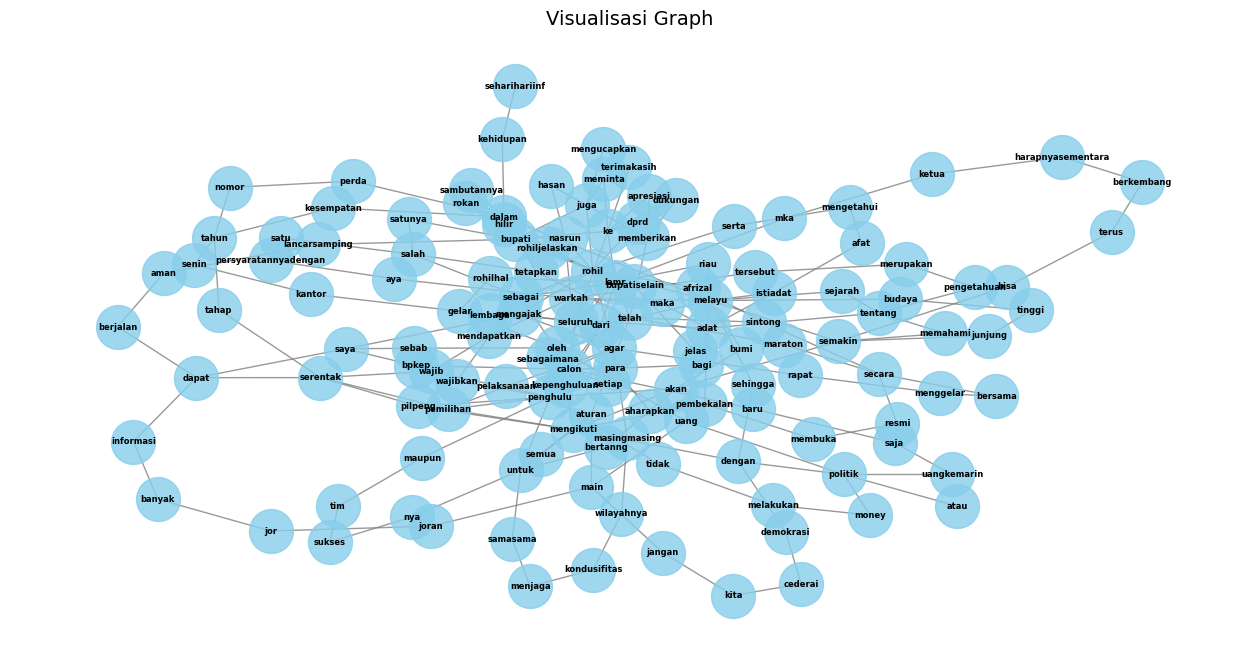

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

# Visualisasi graph dengan penyesuaian
plt.figure(figsize=(16, 8))

# Penentuan layout graf
pos = nx.spring_layout(G_single_news, seed=42)

# Gambar edges
nx.draw_networkx_edges(G_single_news, pos, alpha=0.8, edge_color="gray")

# Gambar nodes
nx.draw_networkx_nodes(G_single_news, pos, node_size=1000, node_color="skyblue", alpha=0.8)

# Label nodes
nx.draw_networkx_labels(G_single_news, pos, font_size=6, font_color="black", font_weight="bold")

plt.title("Visualisasi Graph", fontsize=14)
plt.axis("off")
plt.show()


## Menghitung centrality node

Algoritma PageRank

Page rank merupakan algoritma yang dibuat oleh google yang berguna untuk membantu mesin penelusur agar membandingkan halaman yang memenuhi queri tertentu berdasarkan seberapa sering mereka di referensikan.

Rumus Page Rank

$$PR(A) = (1 - d) + d \left( \frac{PR(B)}{L(B)} + \frac{PR(C)}{L(C)} + \ldots + \frac{PR(N)}{L(N)} \right)
$$


\begin{align*}
    &\bullet \quad PR(A) \text{ adalah PageRank dari halaman } A. \\
    &\bullet \quad d \text{ adalah faktor damping, biasanya diatur menjadi } 0.85. \\
    &\text{Ini mewakili probabilitas bahwa pengguna akan melanjutkan ke halaman lain daripada mengklik tautan.} \\
    &\bullet \quad PR(B), PR(C), \ldots \text{ adalah PageRank dari halaman-halaman yang memiliki tautan ke halaman } A. \\
    &\bullet \quad L(B), L(C), \ldots \text{ adalah jumlah tautan keluar dari masing-masing halaman } B, C, \ldots.
\end{align*}


Dan rumus ini ketika pagerank sudah melakukan iterasi berikutnya
$$PR^{(t+1)}(A) = (1 - d) + d \left( \frac{PR^{(t)}(B)}{L(B)} + \frac{PR^{(t)}(C)}{L(C)} + \ldots + \frac{PR^{(t)}(N)}{L(N)} \right)
$$

Perhitungan otomatis

In [29]:
# Closeness centrality
closeness_centrality_single_news = nx.closeness_centrality(G_single_news)
closeness_df = pd.DataFrame(list(closeness_centrality_single_news.items()), columns=['token', 'closeness_centrality'])

# Pagerank centrality
pagerank_centrality_single_news = nx.pagerank(G_single_news)
pagerank_df = pd.DataFrame(list(pagerank_centrality_single_news.items()), columns=['token', 'pagerank_centrality'])

# Tampilkan DataFrame
print("DataFrame Closeness Centrality:")
print(closeness_df)

print("\nDataFrame Pagerank Centrality:")
print(pagerank_df)

DataFrame Closeness Centrality:
             token  closeness_centrality
0            rokan              0.215625
1            hilir              0.253676
2           bupati              0.273810
3            rohil              0.327791
4          afrizal              0.256983
..             ...                   ...
134          serta              0.249097
135     mengetahui              0.204142
136           afat              0.206587
137      kehidupan              0.216641
138  seharihariinf              0.178295

[139 rows x 2 columns]

DataFrame Pagerank Centrality:
             token  pagerank_centrality
0            rokan             0.005345
1            hilir             0.006766
2           bupati             0.019625
3            rohil             0.026855
4          afrizal             0.006721
..             ...                  ...
134          serta             0.004448
135     mengetahui             0.004944
136           afat             0.004645
137      kehidupan  

Perhitungan Manual

In [30]:
# Baca file Excel
df = pd.read_excel("/content/drive/MyDrive/penambangan_web/hasil/co_occurance_matrix.xlsx")

# Tampilkan DataFrame
df.head()

,source,target,weight,_,Initial Page rank,Current Page Rank iterasi 1,Penerapan,Hasil 1,_.1,Iterasi 2,penerapan 2,Hasil 2,Hasil 3,Hasil 4
0,kampar,upaya,1,"434 node = 1/434 > 0,0023041474654378",0.002304,(1-0.85) + 0.85 (pr(upaya) /1),"0,15 + 0,85 (0,00309597523 / 1)",0.152632,NaN,(1-0.85) + 0.85 (pr(upaya) /1),"0,15 + 0,85 (0,152631579/1)",0.279737,0.387776,0.47961
1,upaya,menciptakan,2,NaN,0.002304,(1-0.85) + 0.85 (pr(menciptakan) /2),"0,15 + 0,85 (0,00309597523 / 2)",0.151316,NaN,(1-0.85) + 0.85 (pr(menciptakan) /2),"0,15 + 0,85 (0,151315789/2)",0.214309,0.241081,0.25246
2,menciptakan,konsi,1,NaN,0.002304,(1-0.85) + 0.85 (pr(konsi) /1),"0,15 + 0,85 (0,00309597523 / 1)",0.152632,NaN,(1-0.85) + 0.85 (pr(konsi) /1),"0,15 + 0,85 (0,152631579/1)",0.279737,0.387776,0.47961
3,konsi,damai,1,NaN,0.002304,(1-0.85) + 0.85 (pr(damai) / 1),"0,15 + 0,85 (0,00309597523 / 1)",0.152632,NaN,(1-0.85) + 0.85 (pr(damai) / 1),"0,15 + 0,85 (0,152631579/1)",0.279737,0.387776,0.47961
4,damai,aman,1,NaN,0.002304,(1-0.85) + 0.85 (pr(aman) / 1),"0,15 + 0,85 (0,00309597523 / 1)",0.152632,NaN,(1-0.85) + 0.85 (pr(aman) / 1),"0,15 + 0,85 (0,152631579/1)",0.279737,0.387776,0.47961


## Ranking Node

In [31]:
# Merangking node kata dari closeness centrality
ranked_by_closeness_single_news = closeness_df.sort_values(by='closeness_centrality', ascending=False)

print("Hasil ranking dari closeness centrality:")
ranked_by_closeness_single_news

Hasil ranking dari closeness centrality:


,token,closeness_centrality
3,rohil,0.327791
25,melayu,0.327014
33,dari,0.313636
27,lamr,0.313636
14,penghulu,0.301969
...,...,...
116,harapnyasementara,0.168704
67,jor,0.165666
66,banyak,0.162162
73,kita,0.161782


In [32]:
# Merangking node kata dari pagerank centrality
ranked_by_pagerank_single_news = pagerank_df.sort_values(by='pagerank_centrality', ascending=False)

print("Hasil ranking dari page rank:")
ranked_by_pagerank_single_news

Hasil ranking dari page rank:


,token,pagerank_centrality
14,penghulu,0.030246
13,calon,0.028737
3,rohil,0.026855
25,melayu,0.023326
27,lamr,0.019751
...,...,...
39,sebagaimana,0.003735
138,seharihariinf,0.003609
102,wajibkan,0.003596
124,setiap,0.003504
